#Python Machine Learning with Scikit-Learn (page 320) 4_24_2020 Classificaton: PCA Decomposition 

In [15]:
'''
Taking account of both petals and sepals sizes (x, y for each meaning 4 variables)
Scatter plot can not take in 4 variables
So PCA or Principal Component Analysis is used instead.
PCA reduces the number of dimensions in the system to "PRINCIPAL COMPONENTS"
For this example:  Reduce 4 vairables/components to 3 dimensions so that it can be displayed in 3D scatter plot.
To do this, in SCIKIT-LEARN you use fit_transform() function

You need to import PCA Sklearn.decomposition module, and define object consutructor using PCA()
n_component option in this case is 3 since it will be in 3D scatterplot. 
Finally you call fit_transform() 
'''


'\nTaking account of both petals and sepals sizes (x, y for each meaning 4 variables)\nScatter plot can not take in 4 variables\nSo PCA or Principal Component Analysis is used instead.\nPCA reduces the number of dimensions in the system to "PRINCIPAL COMPONENTS"\nFor this example:  Reduce 4 vairables/components to 3 dimensions so that it can be displayed in 3D scatter plot.\nTo do this, in SCIKIT-LEARN you use fit_transform() function\n\nYou need to import PCA Sklearn.decomposition module, and define object consutructor using PCA()\nn_component option in this case is 3 since it will be in 3D scatterplot. \nFinally you call fit_transform() \n'

now plotting in ScatterPlot 3D


[]

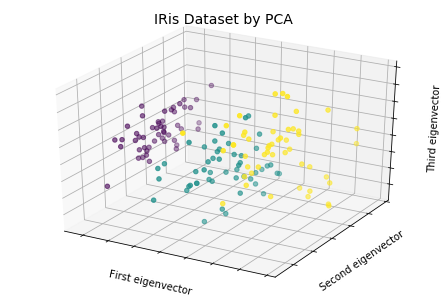

In [16]:

# ***************************************************************

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
species = iris.target

x_reduced = PCA(n_components=3).fit_transform(iris.data)

#******************************************************************
print("now plotting in ScatterPlot 3D")

fig =plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size = 14)
ax.scatter(x_reduced[ :,0],x_reduced[:,1],x_reduced[:,2],c = species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')

ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())


In [17]:
# Now the 3D scatterplot is plotted, you need to perform classification.

# Classification with scikit-learn using classifier  (K- Nearest Neighbors Classifier)

In [18]:
# you need training set and testing set of data that 
# may be from the same super set of data but the subset must be a different data
# Step 1: divide the data in to two (1. training, 2. testing )sets
# Step 0: but you may have to ramdomize/shuffle the data first using np.random.permutation()
# 150 observation in total will be divided into 140 for training data, and 10 for test data

import numpy as np
from sklearn import datasets
np.random.seed(0)

x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))  #randomizing the entire dataset/observation
x_train = x[i[:-10]] # Training data set: start w first row 0 to the end -10 which means 140
y_train = y[i[:-10]]
x_test = x[i[-10:]]   # Testing data set: starts from last 10 meaing 141 -150 of the data 
y_test = y[i[-10:]]   

In [19]:
# we now apply the K-Nearest Neighbor algorithm from KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

#KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski', metric_params = None, n_neighbors = 5, p=2, weights = 'uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# above: The above built a predictive model (p.323)
# Step 1: now we apply the model from 140 data to predict agaisnt knn. 
# Step 2: finally, 10 test data using predict() function in y_test. 

In [21]:
knn.predict(x_test)    # Step 1: this gives me back an array

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [22]:
y_test 

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [23]:
# I can see that I got 10% error?? 

# Now we will write a classification fit() line in the visual of 3 Iris types 

(1.5, 4.900000000000003)

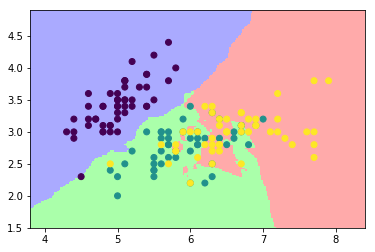

In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:,:2]  #x- axis all rows, 0 - 2 columns
y = iris.target     #y -axis species

x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5

#MESH

cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(-0.4, 2.980000000000003)

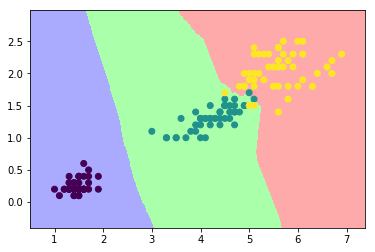

In [28]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:,2:4]  #x- axis (petals length - width) all rows, 0 - 2 columns
y = iris.target     #y -axis species

x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5

#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

#plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

